**Doug Marcum  
DSC 530 - Final Project: Does defense win championships? A look at the NBA from 2009 – 2019  
2/29/2020**

## Introduction  
For this term project, an evaluation of defensive importance within the National Basketball Association (NBA) will be conducted, to determine if the adage of ‘Defense Wins Championships!’ remains accurate in today’s game. Since sports have been played and a score kept, there have been coaches, sideline parents, armchair experts, and others declaring the importance of defense. While defense is an integral part of most team-oriented sports, is it the most important aspect of winning? Does the best defense have a better chance at winning a championship in comparison to the best offense? 

Many modern professional leagues have adapted over time to account for player safety, obtaining higher viewership/ratings, fan interest in higher scoring games, and shortened attention spans. By doing so, gameplay has also changed from era to era. Athletes have increased in size and ability, creating discrepancies in performance when comparing eras. Taking into consideration these variations, the focus will be on the past decade (2009 – 2019) for evaluation. With many professional leagues to choose from, it is believed the NBA provides some of the best data to capture and analyze. When evaluating the three major professional sports in the US, Major League Baseball and the National Football League were eliminated based on the following:

1. National Football League – While defense plays a very vital role in football, it is one of three teams taking the field at any given point. Being broken into camps of offense, special teams, and defense, to state that one is more important than the other takes away from the value provided by the other two units.  
2. Major League Baseball – Baseball is a one-on-one sport wrapped in the disguise of a team-oriented sport. Much like football, many aspects of baseball can be broken into team or individual elements. With basketball, pace of play is high and engagement in both offense and defense is required. 


## Import Necessary Libraries

In [1]:
from __future__ import print_function, division

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import thinkstats2
import thinkplot

from scipy.stats import pearsonr
from scipy.stats import spearmanr

import statsmodels.formula.api as smf

## Data  

The data for this project was obtained from [Basketball-Reference.Com](https://www.basketball-reference.com) (BRC). Each [season](https://www.basketball-reference.com/leagues/) was downloaded and saved to a CSV file. This was the simplest approach taken, due to time constraints. By doing so, the data files from BRC we evaluated and did not require additional data cleansing. A focus was placed on more advanced metrics being utilized by the NBA in determining the importance of defense in today's game. 

A [Glossary of Terms](https://www.basketball-reference.com/about/glossary.html) can help expand on any variables this project does or does not utilize.

In [2]:
data = pd.read_csv('2010_to_2019_NBA_Team_Stats.csv')

In [3]:
# quick skim to insure data was loaded properly
data.head()

,Season,Team,Age,W,L,Playoff,Champion,PW,PL,MOV,...,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1
0,2019,Cleveland Cavaliers,25.2,19,63,0,0,19,63,-9.61,...,0.332,0.540,0.503,12.2,23.7,0.187,0.564,11.5,77.0,0.181
1,2019,Phoenix Suns,24.0,19,63,0,0,19,63,-9.34,...,0.335,0.552,0.514,13.8,20.5,0.202,0.545,13.5,72.5,0.236
2,2018,Golden State Warriors,28.8,58,24,1,1,56,26,5.98,...,0.339,0.603,0.569,14.1,21.0,0.195,0.504,12.6,76.3,0.186
3,2019,Washington Wizards,26.5,32,50,0,0,34,48,-2.90,...,0.370,0.567,0.531,12.3,21.3,0.204,0.546,13.5,74.1,0.199
4,2019,Atlanta Hawks,25.1,29,53,0,0,27,55,-6.02,...,0.403,0.555,0.522,14.3,24.7,0.192,0.541,12.8,76.4,0.237


In [4]:
# check each column title
data.columns

Index(['Season', 'Team', 'Age', 'W', 'L', 'Playoff', 'Champion', 'PW', 'PL',
       'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr',
       'TS%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'eFG%.1', 'TOV%.1', 'DRB%',
       'FT/FGA.1'],
      dtype='object')

In [5]:
# confirm variable types
data.dtypes

Season        int64
Team         object
Age         float64
W             int64
L             int64
Playoff       int64
Champion      int64
PW            int64
PL            int64
MOV         float64
SOS         float64
SRS         float64
ORtg        float64
DRtg        float64
NRtg        float64
Pace        float64
FTr         float64
3PAr        float64
TS%         float64
eFG%        float64
TOV%        float64
ORB%        float64
FT/FGA      float64
eFG%.1      float64
TOV%.1      float64
DRB%        float64
FT/FGA.1    float64
dtype: object

In [6]:
# convert 'Season' to an object from an integer
data.Season = data.Season.astype(object)

## Variables  

Listed below are descriptions of selected variables:
1. Season - The season/year the team played in.
2. Team - Identifier for the team by City / Name.
3. Champion - An integer code for the outcome of the winner of the season. The code 1 indicates the winner. 
4. Playoffs - An integer code for teams in the playoffs in each season. The code 1 indicates a playoff participant. 
5. Wins - The number of wins a team had in each season.
6. SRS - Simple Rating System: a rating that takes into account average point differential and strength of schedule. The rating is denominated in points above/below average, where zero is average.
7. ORtg - Offensive Rating: for teams it is points scored per 100 possessions (higher rating is better).
8. DRtg - Defensive Rating: for teams it is points allowed per 100 possessions (lower rating is better).
9. Pace - Pace Factor: the formula is 48 * ((Tm Poss + Opp Poss) / (2 * (Tm MP / 5))). Pace factor is an estimate of the number of possessions per 48 minutes by a team.

In [7]:
# create new dataframe to simplify the data visually
df = pd.DataFrame()
df['Season'] = data.Season 
df['Team'] = data.Team 
df['Champion'] = data.Champion
df['Playoffs'] = data.Playoff
df['Wins'] = data.W
df['SRS'] = data.SRS
df['ORtg'] = data.ORtg
df['DRtg'] = data.DRtg
df['Pace'] = data.Pace

# check to make certain everything is there
df.head()

,Season,Team,Champion,Playoffs,Wins,SRS,ORtg,DRtg,Pace
0,2019,Cleveland Cavaliers,0,0,19,-9.39,107.7,117.6,96.6
1,2019,Phoenix Suns,0,0,19,-8.61,105.9,115.1,100.5
2,2018,Golden State Warriors,1,1,58,5.79,113.6,107.6,99.6
3,2019,Washington Wizards,0,0,32,-3.30,111.1,113.9,101.4
4,2019,Atlanta Hawks,0,0,29,-6.06,108.1,113.9,103.9


In [8]:
# execute correlation heat map to illustrate potential correlations to be evaluated
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Champion,Playoffs,Wins,SRS,ORtg,DRtg,Pace
Champion,1,0.17,0.28,0.28,0.21,-0.18,0.037
Playoffs,0.17,1,0.8,0.76,0.51,-0.57,-0.087
Wins,0.28,0.8,1,0.95,0.74,-0.57,0.0098
SRS,0.28,0.76,0.95,1,0.74,-0.64,-0.024
ORtg,0.21,0.51,0.74,0.74,1,0.031,0.33
DRtg,-0.18,-0.57,-0.57,-0.64,0.031,1,0.42
Pace,0.037,-0.087,0.0098,-0.024,0.33,0.42,1


In [9]:
df.describe()

,Champion,Playoffs,Wins,SRS,ORtg,DRtg,Pace
count,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.033333,0.54000,40.196667,-0.001533,107.177000,107.170000,94.548333
std,0.179805,0.49923,12.607981,4.536997,3.659775,3.352147,3.391031
min,0.000000,0.00000,7.000000,-13.960000,95.200000,98.200000,87.700000
25%,0.000000,0.00000,30.750000,-3.112500,104.575000,104.800000,91.800000
50%,0.000000,1.00000,41.000000,0.110000,106.850000,107.200000,94.350000
75%,0.000000,1.00000,50.000000,3.382500,109.825000,109.900000,96.700000
max,1.000000,1.00000,73.000000,11.350000,115.900000,117.600000,103.900000


## Histograms  

In [10]:
# increase the size of the plots
plt.rcParams['figure.figsize'] = [10, 10]

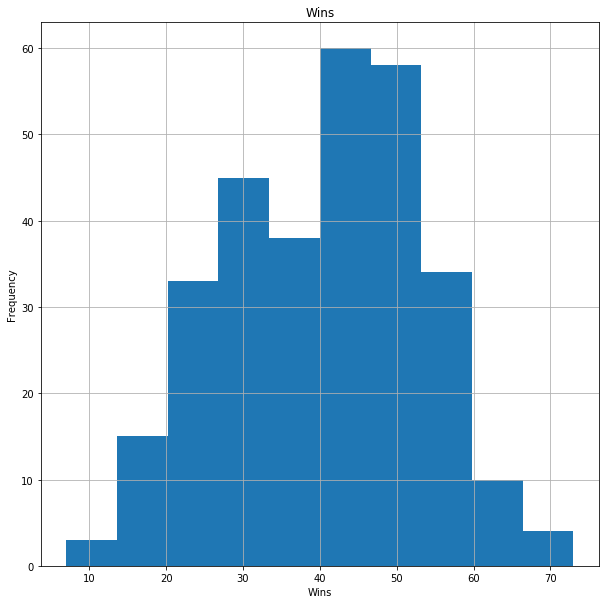

In [11]:
# histogram for Wins
plt.hist(df.Wins)
plt.title('Wins')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.grid(True)

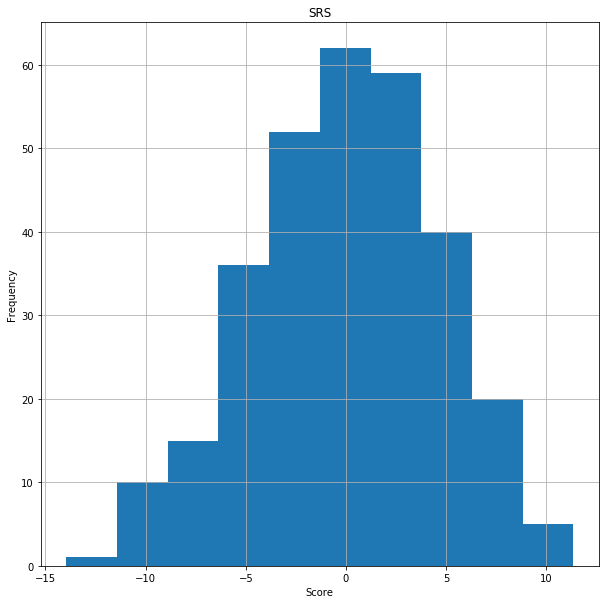

In [12]:
# histogram for SRS
plt.hist(df.SRS)
plt.title('SRS')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)

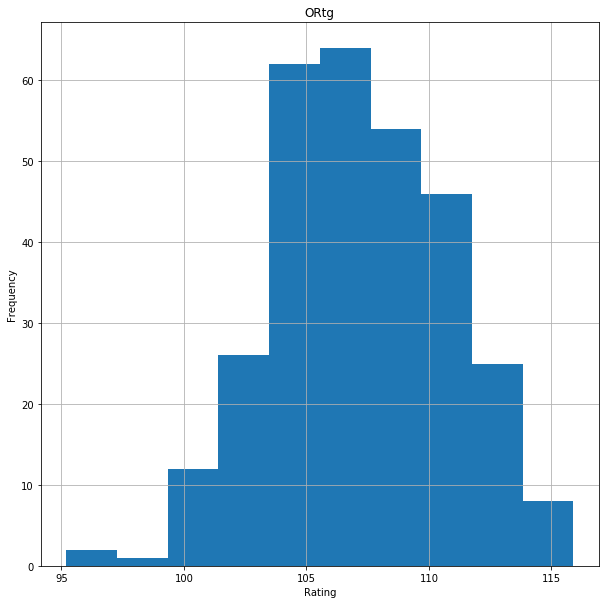

In [13]:
# histogram for Offensive Rating
plt.hist(df.ORtg)
plt.title('ORtg')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)

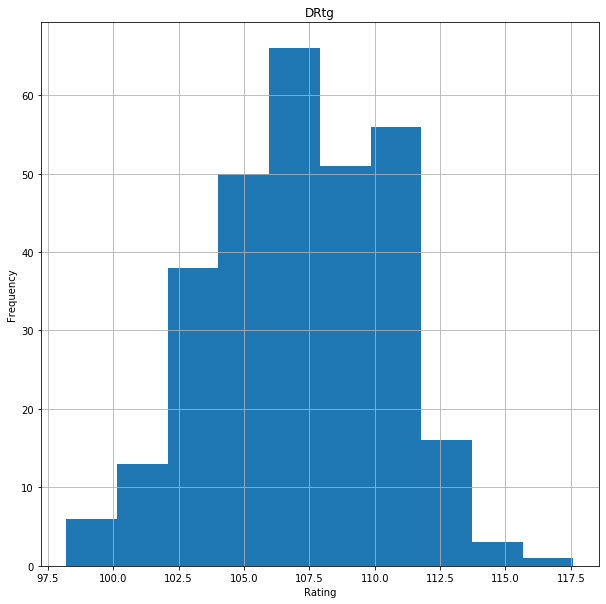

In [14]:
# histogram for Defensive Rating
plt.hist(df.DRtg)
plt.title('DRtg')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)

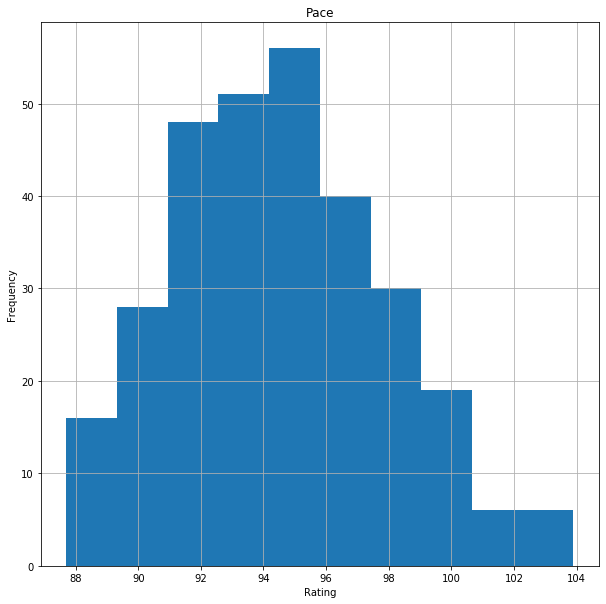

In [15]:
# histogram for Pace
plt.hist(df.Pace)
plt.title('Pace')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)

##  Probability Mass Function (PMF)  

Two probability mass functions are examined. First the Champion variable is split into teams that won the championship (Champs) and those that did not (Not_Champs). This shows that no championship team had a DRtg higher than the median DRtg (107.2).  

The second PMF, the variable Wins is split into two groups. The first, Above_Average, consists of teams with total season wins above the mean for Wins. The second, Below_Average, consists of teams with total season wins below the mean for Wins. Again, a pattern, as to be expected, of teams with higher win totals having lower DRtg. 

In [16]:
# Split Champion into Haves and Have Nots
Champs = df[df.Champion == 1]
Not_Champs = df[df.Champion == 0]

In [17]:
# create PMF for each
Champs_DRtg = Champs.DRtg
Champs_DRtg_pmf = thinkstats2.Pmf(Champs_DRtg, label='Champs')
Not_Champs_DRtg = Not_Champs.DRtg
Not_Champs_DRtg_pmf = thinkstats2.Pmf(Not_Champs_DRtg, label='Not Champs')

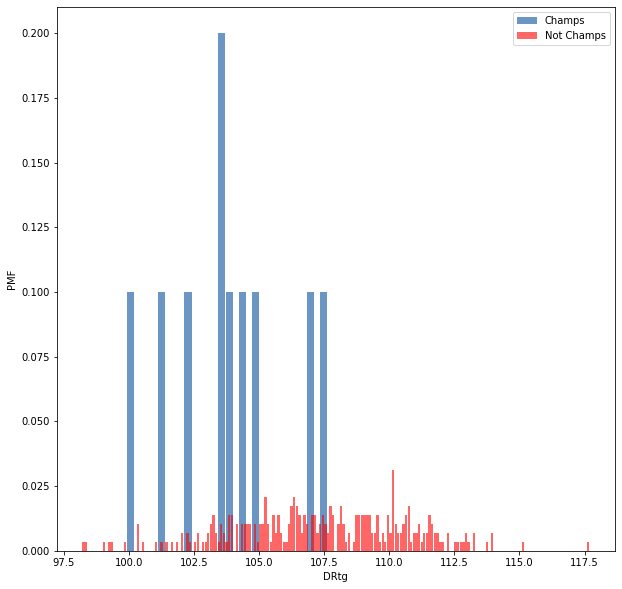

In [18]:
# Plot 
thinkplot.PrePlot(2)
thinkplot.Hist(Champs_DRtg_pmf, align='right')
thinkplot.Hist(Not_Champs_DRtg_pmf, align='left', color='red')
thinkplot.Config(xlabel='DRtg', ylabel='PMF')

In [19]:
df.DRtg.median()

107.2

In [20]:
# Split Wins into those above and below average wins
Above_Average = df[df.Wins >= df.Wins.mean()]
Below_Average = df[df.Wins < df.Wins.mean()]
df.Wins.mean()

40.196666666666665

In [21]:
# create PMF for each
Above_Average_DRtg = Above_Average.DRtg
Above_Average_DRtg_pmf = thinkstats2.Pmf(Above_Average_DRtg, label='Above Average Wins')
Below_Average_DRtg = Below_Average.DRtg
Below_Average_DRtg_pmf = thinkstats2.Pmf(Below_Average_DRtg, label='Below Average Wins')

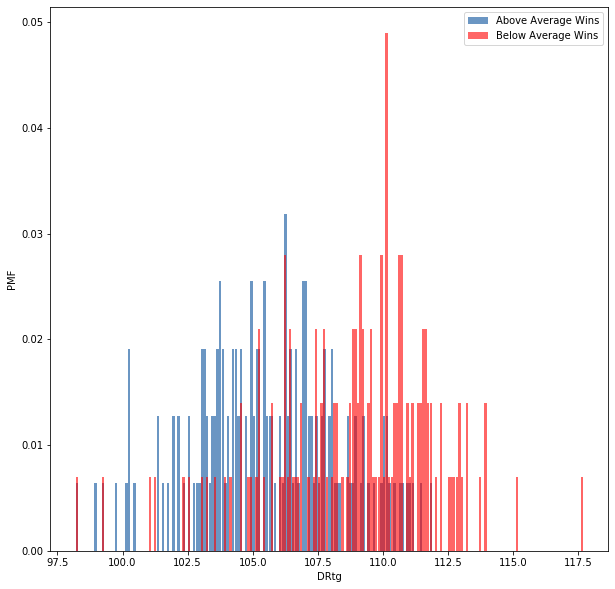

In [22]:
# Plot
thinkplot.PrePlot(2)
thinkplot.Hist(Above_Average_DRtg_pmf, align='right')
thinkplot.Hist(Below_Average_DRtg_pmf, align='left', color='red')
thinkplot.Config(xlabel='DRtg', ylabel='PMF')

## Cumulative Distribution Function (CDF)  

For understanding CDF, three CDF plots are utilized. The first plot is the CDF for DRtg across the data. This plot does not share as much as was hoped, other than the Interquartile Range for DRtg is 104.8 - 109.9.  

The next two CDFs compare Above_Average_DRtg to Below_Average_DRtg and Champs_DRtg to Not_Champs_DRtg. These plots how continue to show that teams with higher wins and more championships have lower DRtg.

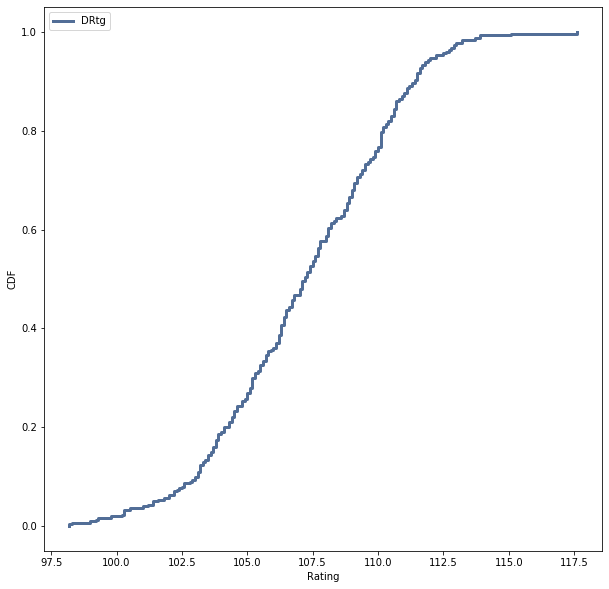

In [23]:
# Plot CDF of Defensive Rating
cdf = thinkstats2.Cdf(df.DRtg, label='DRtg')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Rating', ylabel='CDF', loc='upper left')

In [24]:
# function for Percentile Rank (PR)
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

# function to take PR and return a percentile
def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

# IQR is the Interquartile Range (the difference between the 75th and 25th percentiles)
IQR = (cdf.Percentile(25), cdf.Percentile(75))
IQR  

(104.8, 109.9)

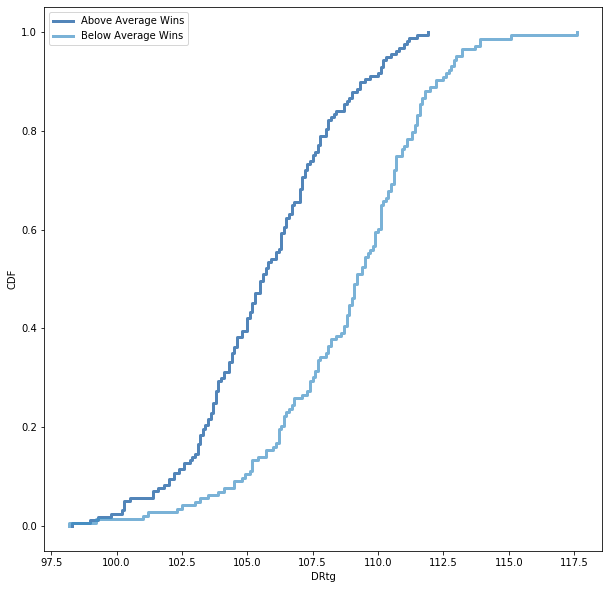

In [25]:
# create CDF for each and plot
Above_Average_DRtg_cdf = thinkstats2.Cdf(Above_Average_DRtg, label='Above Average Wins')
Below_Average_DRtg_cdf = thinkstats2.Cdf(Below_Average_DRtg, label='Below Average Wins')

thinkplot.PrePlot(2)
thinkplot.Cdfs([Above_Average_DRtg_cdf, Below_Average_DRtg_cdf])
thinkplot.Config(xlabel='DRtg', ylabel='CDF')

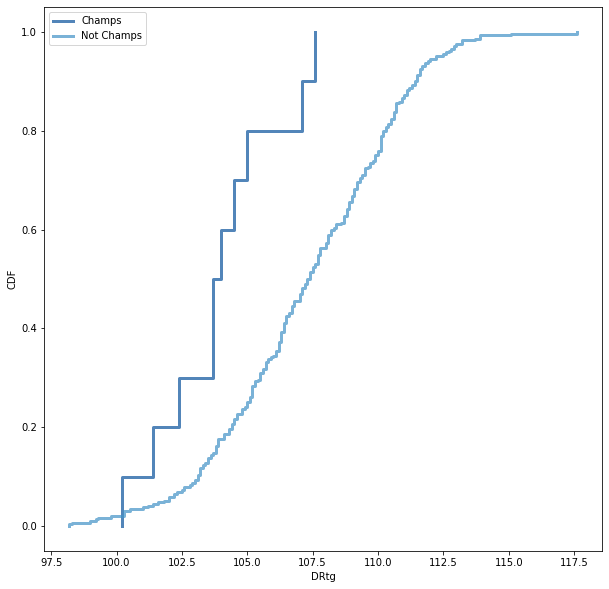

In [26]:
# create CDF for each and plot
Champs_DRtg_cdf = thinkstats2.Cdf(Champs_DRtg, label='Champs')
Not_Champs_DRtg_cdf = thinkstats2.Cdf(Not_Champs_DRtg, label='Not Champs')

thinkplot.PrePlot(2)
thinkplot.Cdfs([Champs_DRtg_cdf, Not_Champs_DRtg_cdf])
thinkplot.Config(xlabel='DRtg', ylabel='CDF')

## Analytical Distribution  

A normal probability plot shows the distribution of DRtg on a linear scale with a normal model. Additionally, the second plot shows the same distribution on a log scale with a lognormal model. The two models appear to have approximately the same fit, and both would be good models for the data.

In [27]:
# function to estimate the parameters of a normal distribution and plot the data and a normal model
def MakeNormalModel(x):
    # Plots a CDF with a Normal model.
    cdf = thinkstats2.Cdf(x, label='DRtg')

    mean, var = thinkstats2.TrimmedMeanVar(x)
    std = np.sqrt(var)
    print('n, mean, std', len(x), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

n, mean, std 300 107.17312925170069 3.149871890866711


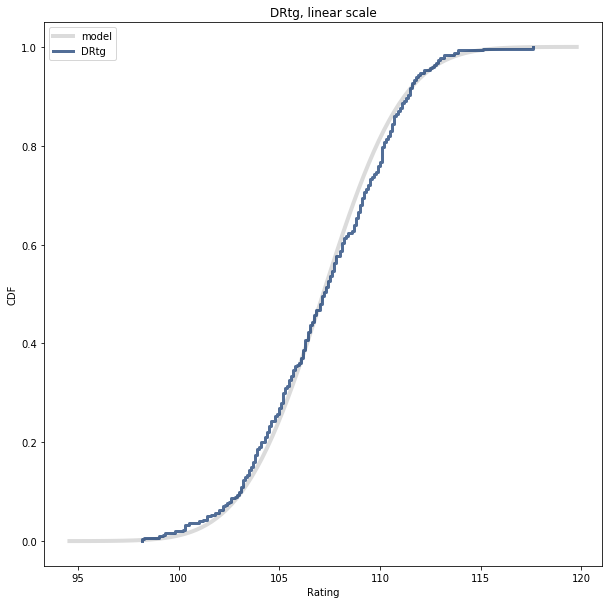

In [28]:
# plot linear 
MakeNormalModel(df.DRtg)
thinkplot.Config(title='DRtg, linear scale', xlabel='Rating',
                 ylabel='CDF', loc='upper left')

n, mean, std 300 2.029897515007144 0.012806978272396597


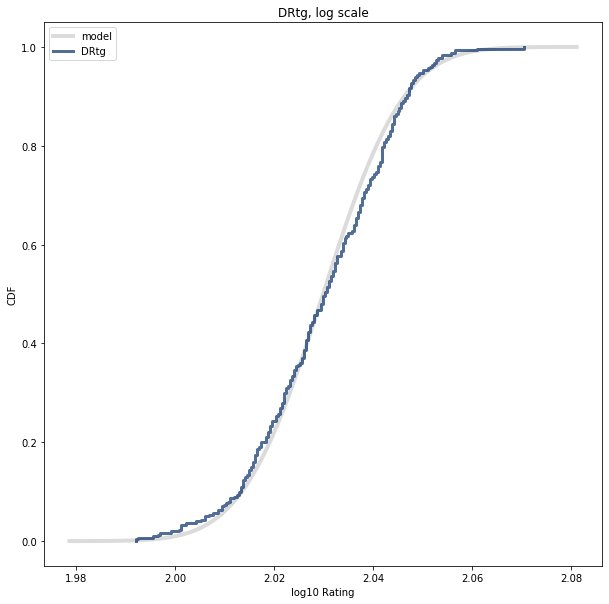

In [29]:
log_DRtg = np.log10(df.DRtg)
MakeNormalModel(log_DRtg)
thinkplot.Config(title='DRtg, log scale', xlabel='log10 Rating',
                 ylabel='CDF', loc='upper left')

## Scatter Plots

Below multiple variables were plotted to assist in illustrating potential relationships. From this the following was found:  

1. DRtg and Pace - Covariance: Positive, Correlation: Positive and Linear
2. DRtg and Wins - Covariance: Negative, Correlation: Negative and Linear
3. ORtg and Wins - Covariance: Positive, Correlation: Positive and Linear
4. DRtg and SRS - Covariance: Negative, Correlation: Negative and Linear  

These findings are consistent with the information gathered thus far. 

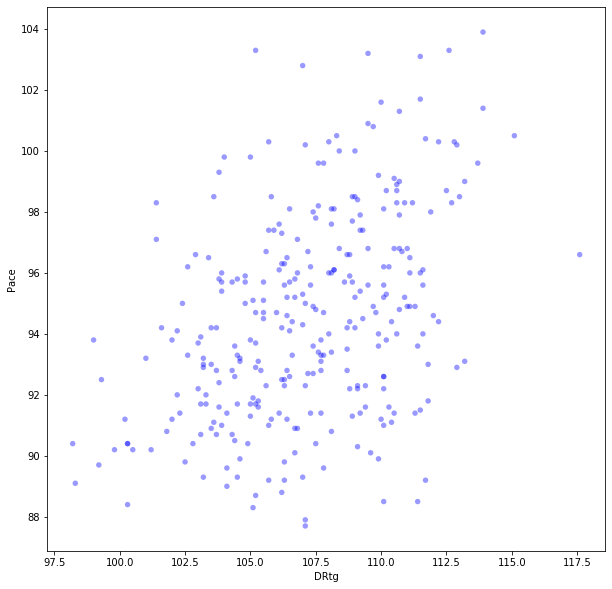

<Figure size 576x432 with 0 Axes>

In [30]:
# Scatter Plot of DRtg and Pace
thinkplot.Scatter(df.DRtg, df.Pace, alpha = .4)
thinkplot.Show(xlabel='DRtg', ylabel='Pace')

In [31]:
# function for determining covariance
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [32]:
print('Relationships between DRtg and Pace:')
print('Covariance:', Cov(df.DRtg, df.Pace))
print("Pearson's Correlation:", pearsonr(df.DRtg, df.Pace))
print("Spearman's Rank Correlation:", spearmanr(df.DRtg, df.Pace))

Relationships between DRtg and Pace:
Covariance: 4.729150000000001
Pearson's Correlation: (0.41742483301990907, 4.44864494024275e-14)
Spearman's Rank Correlation: SpearmanrResult(correlation=0.40097836221546984, pvalue=5.144092141151457e-13)


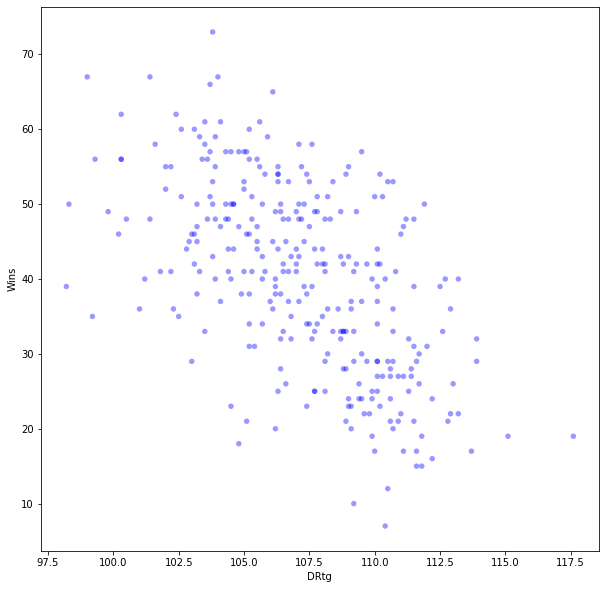

<Figure size 576x432 with 0 Axes>

In [33]:
# Scatter Plot of DRtg and Wins
thinkplot.Scatter(df.DRtg, df.Wins, alpha = .4)
thinkplot.Show(xlabel='DRtg', ylabel='Wins')

In [34]:
print('Relationships between DRtg and Wins:')
print('Covariance:', Cov(df.DRtg, df.Wins))
print("Pearson's Correlation:", pearsonr(df.DRtg, df.Wins))
print("Spearman's Rank Correlation:", spearmanr(df.DRtg, df.Wins))

Relationships between DRtg and Wins:
Covariance: -24.163433333333334
Pearson's Correlation: (-0.5736408815709826, 1.1979001487040022e-27)
Spearman's Rank Correlation: SpearmanrResult(correlation=-0.5776458346690528, pvalue=4.2581362940641475e-28)


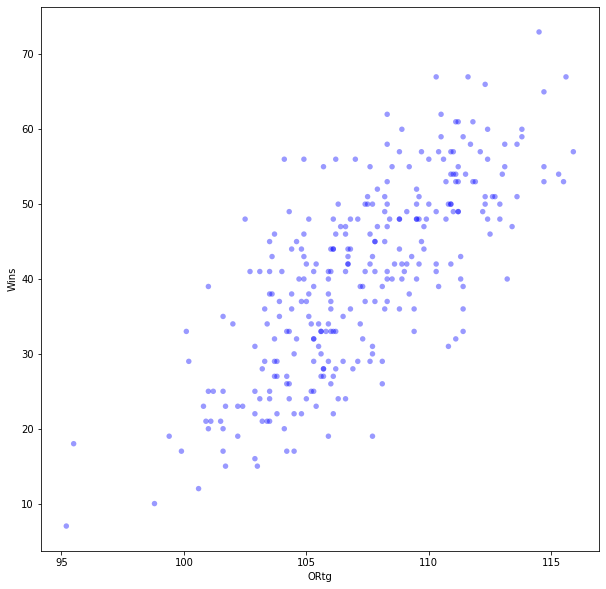

<Figure size 576x432 with 0 Axes>

In [35]:
# Scatter Plot of ORtg and Wins
thinkplot.Scatter(df.ORtg, df.Wins, alpha = .4)
thinkplot.Show(xlabel='ORtg', ylabel='Wins')

In [36]:
print('Relationships between ORtg and Wins:')
print('Covariance:', Cov(df.ORtg, df.Wins))
print("Pearson's Correlation:", pearsonr(df.ORtg, df.Wins))
print("Spearman's Rank Correlation:", spearmanr(df.ORtg, df.Wins))

Relationships between ORtg and Wins:
Covariance: 34.20519
Pearson's Correlation: (0.7437760106443292, 4.5533031562050703e-54)
Spearman's Rank Correlation: SpearmanrResult(correlation=0.734694711333794, pvalue=3.797609273284383e-52)


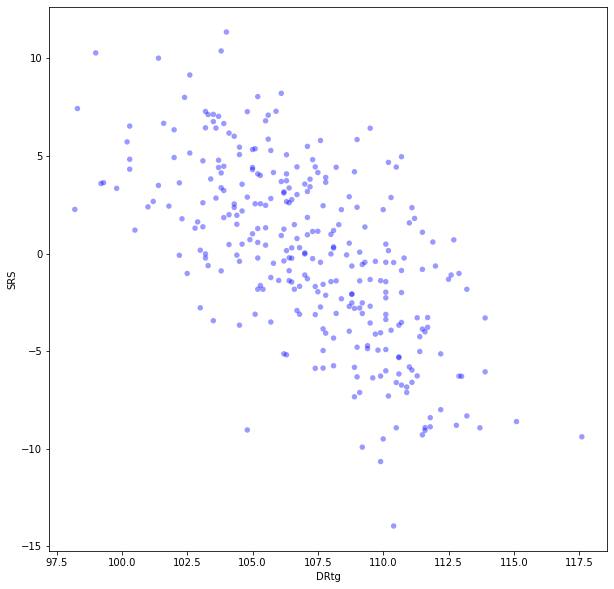

<Figure size 576x432 with 0 Axes>

In [37]:
# Scatter Plot of DRtg and SRS
thinkplot.Scatter(df.DRtg, df.SRS, alpha = .4)
thinkplot.Show(xlabel='DRtg', ylabel='SRS')

In [38]:
print('Relationships between DRtg and SRS:')
print('Covariance:', Cov(df.DRtg, df.SRS))
print("Pearson's Correlation:", pearsonr(df.DRtg, df.SRS))
print("Spearman's Rank Correlation:", spearmanr(df.DRtg, df.SRS))

Relationships between DRtg and SRS:
Covariance: -9.761219333333335
Pearson's Correlation: (-0.6439654336617834, 1.5628855014065917e-36)
Spearman's Rank Correlation: SpearmanrResult(correlation=-0.648368979761349, pvalue=3.6205293892514363e-37)


## Hypothesis Testing  

For hypothesis testing, two tests were executed on the data. The first, a permutation test on Champs_DRtg and Not_Champs_DRtg was ran. The results show p < .001 and can be concluded that the difference in DRtg is statistically significant.  

For the second test, a correlation test between Wins and DRtg was executed. The computed p-value < 0.001 and after multiple iterations the actual correlation is approximately 0.573. The observed correlation is larger and statistically highly significant.

### Permutation Test

In [39]:
# class and functions for the test
class DiffMeansPermute(thinkstats2.HypothesisTest):
    thinkstats2.RandomSeed(178)
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [40]:
# use Champs_DRtg and Not_Champs_DRtg values for data
data = Champs_DRtg.values, Not_Champs_DRtg.values
DiffMeans_ht = DiffMeansPermute(data)
DiffMeans_pvalue = DiffMeans_ht.PValue()
DiffMeans_pvalue

0.001

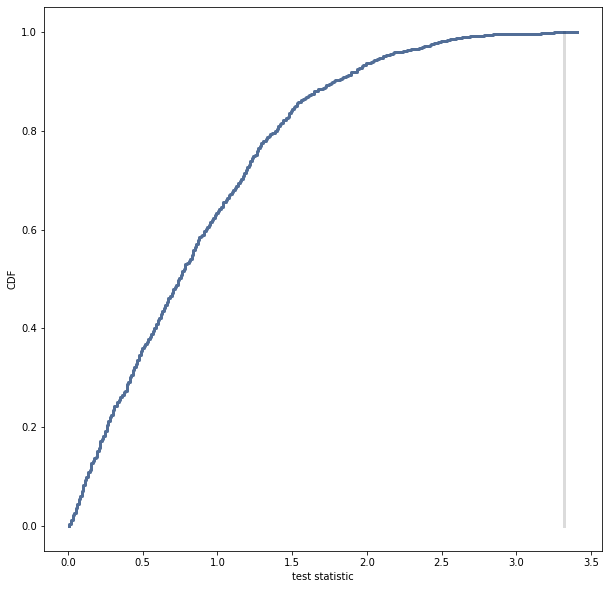

<Figure size 576x432 with 0 Axes>

In [41]:
DiffMeans_ht.PlotCdf()
thinkplot.Show(xlabel='test statistic', ylabel='CDF')

### Correlation Test

In [42]:
class CorrelationPermute(thinkstats2.HypothesisTest):
    
    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [43]:
data = df.Wins.values, df.DRtg.values
Corr_ht = CorrelationPermute(data)
Corr_pvalue = Corr_ht.PValue()
Corr_pvalue

0.0

In [44]:
Corr_ht.actual

0.5736408815709826

## Regression Analysis  

Multiple logistic regression models were built and executed based on different dependent variables. The first model had Champion as the dependent variable with multiple explanatory variables (DRtg, SRS, Pace). For comparison, a second model had Champion as the dependent variable with multiple explanatory variables (ORtg, SRS, Pace). The results from these models delivered extremely high accuracy (DRtg - 96.7%, ORtg - 96.3%), so a second set of models were built with Playoffs as the dependent variable. Here the results returned (DRtg - 75.7%, ORtg - 73.3%).  

To attempt to answer the question of defense equally championships, new predictions were made based off the following:  
Defense = (Champs.DRtg.min(), Champs.SRS.max(), Champs.Pace.min())  
Offense = (Champs.DRtg.max(), Champs.SRS.max(), Champs.Pace.max())  

This would hypothetically create the best defensive metrics team from the Champion over the past ten (10) seasons, as well as the best offensive metrics team. The result show that these scenarios, while not head to head, predict the max defensive team to win the championship an estimated 70.21% and the max offensive team an estimated 68.10%.

In [45]:
# DRtg logistic regression model, Champion dependent
model_dc = smf.logit('Champion ~ DRtg + SRS + Pace', data=df)
results_dc = model_dc.fit()
results_dc.summary()

Optimization terminated successfully.
         Current function value: 0.096384
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Champion   No. Observations:                  300
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            3
Date:                Sat, 29 Feb 2020   Pseudo R-squ.:                  0.3405
Time:                        09:20:17   Log-Likelihood:                -28.915
converged:                       True   LL-Null:                       -43.843
Covariance Type:            nonrobust   LLR p-value:                 1.479e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9451     15.617     -0.253      0.801     -34.553      26.663
DRtg          -0.0070      0.189     -0.037      0.970      -0.377       0.363
SRS            0.5515      0.180      3.069      0.002       0.199       0.904
Pace          -0.0083      0.140     -0.059      0.953      -0.282       0.266
==============================================================================
"""

In [46]:
# determine the accuracy of the DRtg model to baseline of guessing Champion everytime
endog = pd.DataFrame(model_dc.endog, columns=[model_dc.endog_names])

actual = endog['Champion']
baseline = actual.mean()
print('baseline of model_dc:', round((baseline * 100),4), '%')

predict = (results_dc.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)

acc_dc = round(((sum(true_pos) + sum(true_neg)) / len(actual)) *100,4)

print('accuracy of the model_dc:', acc_dc, '%')

baseline of model_dc: 3.3333 %
accuracy of the model_dc: 96.6667 %


In [47]:
# ORtg model for comparison, Champion dependent
model_oc = smf.logit('Champion ~ ORtg + SRS + Pace', data=df)
results_oc = model_oc.fit()
results_oc.summary()

Optimization terminated successfully.
         Current function value: 0.096374
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Champion   No. Observations:                  300
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            3
Date:                Sat, 29 Feb 2020   Pseudo R-squ.:                  0.3406
Time:                        09:20:17   Log-Likelihood:                -28.912
converged:                       True   LL-Null:                       -43.843
Covariance Type:            nonrobust   LLR p-value:                 1.475e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5622     16.926     -0.329      0.742     -38.737      27.613
ORtg           0.0165      0.191      0.086      0.931      -0.358       0.391
SRS            0.5482      0.164      3.336      0.001       0.226       0.870
Pace          -0.0180      0.131     -0.138      0.891      -0.275       0.239
==============================================================================
"""

In [48]:
# determine the accuracy of the ORtg model to baseline of guessing Champion everytime
endog = pd.DataFrame(model_oc.endog, columns=[model_oc.endog_names])

actual = endog['Champion']
baseline = actual.mean()
print('baseline of model_oc:', round((baseline * 100),4), '%')

predict = (results_oc.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)

acc_oc = round(((sum(true_pos) + sum(true_neg)) / len(actual)) *100,4)

print('accuracy of the model_oc:', acc_oc, '%')

baseline of model_oc: 3.3333 %
accuracy of the model_oc: 96.3333 %


In [49]:
# difference in DRtg vs ORtg in predicting the champion
print(round(acc_dc - acc_oc, 4), '%')

0.3334 %


In [50]:
# DRtg logistic regression model, Playoffs dependent
model_dp = smf.logit('Playoffs ~ DRtg', data=df)
results_dp = model_dp.fit()
results_dp.summary()

Optimization terminated successfully.
         Current function value: 0.493638
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Playoffs   No. Observations:                  300
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            1
Date:                Sat, 29 Feb 2020   Pseudo R-squ.:                  0.2845
Time:                        09:20:18   Log-Likelihood:                -148.09
converged:                       True   LL-Null:                       -206.98
Covariance Type:            nonrobust   LLR p-value:                 1.934e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.3451      6.428      8.454      0.000      41.745      66.945
DRtg          -0.5046      0.060     -8.443      0.000      -0.622      -0.387
==============================================================================
"""

In [51]:
# ORtg logistic regression model, Playoffs dependent
model_op = smf.logit('Playoffs ~ ORtg', data=df)
results_op = model_op.fit()
results_op.summary()

Optimization terminated successfully.
         Current function value: 0.541136
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Playoffs   No. Observations:                  300
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            1
Date:                Sat, 29 Feb 2020   Pseudo R-squ.:                  0.2157
Time:                        09:20:18   Log-Likelihood:                -162.34
converged:                       True   LL-Null:                       -206.98
Covariance Type:            nonrobust   LLR p-value:                 3.419e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.8834      5.150     -7.744      0.000     -49.978     -29.789
ORtg           0.3742      0.048      7.766      0.000       0.280       0.469
==============================================================================
"""

In [52]:
# determine the accuracy of the DRtg model to baseline of guessing Playoffs everytime
endog = pd.DataFrame(model_dp.endog, columns=[model_dp.endog_names])

actual = endog['Playoffs']
baseline = actual.mean()
print('baseline of model_dp:', round((baseline * 100),4), '%')

predict = (results_dp.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)

acc_dp = round(((sum(true_pos) + sum(true_neg)) / len(actual)) *100,4)

print('accuracy of model_dp:', acc_dp, '%')

baseline of model_dp: 54.0 %
accuracy of model_dp: 75.6667 %


In [53]:
# determine the accuracy of the DRtg model to baseline of guessing Playoffs everytime
endog = pd.DataFrame(model_op.endog, columns=[model_op.endog_names])

actual = endog['Playoffs']
baseline = actual.mean()
print('baseline of model_op:', round((baseline * 100),4), '%')

predict = (results_op.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)

acc_op = round(((sum(true_pos) + sum(true_neg)) / len(actual)) *100,4)

print('accuracy of model_dp:', acc_op, '%')

baseline of model_op: 54.0 %
accuracy of model_dp: 73.6667 %


In [54]:
# difference in DRtg vs ORtg in predicting playoff teams
print(round(acc_dp - acc_op, 4), '%')

2.0 %


In [55]:
# prediction for team with the best ratings of Champs over the past 10 seasons (defense focus)
columns_d = ['DRtg', 'SRS', 'Pace']
def_champ = pd.DataFrame([[Champs.DRtg.min(), Champs.SRS.max(), Champs.Pace.min()]], columns=columns_d)
def_champ_percent_to_win = results_dc.predict(def_champ) * 100
def_champ_percent_to_win

0    70.209862
dtype: float64

In [56]:
# prediction for team with the best ratings of Champs over the past 10 seasons (offense focus)
columns_o = ['ORtg', 'SRS', 'Pace',]
off_champ = pd.DataFrame([[Champs.ORtg.max(), Champs.SRS.max(), Champs.Pace.max()]], columns=columns_o)
off_champ_percent_to_win = results_oc.predict(off_champ) * 100
off_champ_percent_to_win

0    68.103462
dtype: float64